In [1]:
# Trtatamiendo de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# sistema operativa
import warnings
import os

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Librerias de aprendizaje NO supervisado
from sklearn.preprocessing import MinMaxScaler #las variables hay que llevarlas a una escala de medicion unica
from sklearn.cluster import KMeans #libreria de clusterizacion

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pwd

'/content'

In [4]:
df =pd.read_excel('Empresas_Reactiva_Peru.xlsx')
#df = pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71552 entries, 0 to 71551
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RUC              71552 non-null  float64
 1   NOMBRE_EMPRESA   71552 non-null  object 
 2   SECTOR           71552 non-null  object 
 3   BANCO            71552 non-null  object 
 4   MONTO_PRESTAMO   71552 non-null  float64
 5   FLG_1MM          71552 non-null  int64  
 6   MONTO_COBERTURA  71552 non-null  float64
 7   DEPARTAMENTO     71552 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 4.4+ MB


In [15]:
df.head()

,RUC,NOMBRE_EMPRESA,SECTOR,BANCO,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,DEPARTAMENTO
0,10000006209.0,HERTER REATEGUI MORI,INDUSTRIA MANUFACTURERA,CRÉDITO,10724.0,0,10509.5,UCAYALI
1,10000027443.0,RANDOLFO SANCHEZ SANCHEZ,OTROS SERVICIOS,CRÉDITO,6843.0,0,6706.1,UCAYALI
2,10000046383.0,DAVID RAMON FLORES RAMIREZ,COMERCIO,CRÉDITO,12154.0,0,11910.9,UCAYALI
3,10000051891.0,BETTY RUIZ DELGADO,COMERCIO,CRÉDITO,5197.0,0,5093.1,UCAYALI
4,10000059205.0,NILTON RENGIFO MURRIETA,COMERCIO,BANCO BBVA PERU,50000.0,0,47500.0,LORETO


In [14]:
pd.set_option('display.float_format', '{:.1f}'.format)

In [6]:
df.shape

(71552, 8)

In [16]:
df1 = pd.read_excel('Income.xlsx')
#df1 = pd.DataFrame(df1)
#df1.head(n=10)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71552 entries, 0 to 71551
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RUC     71552 non-null  float64
 1   INCOME  71552 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


In [17]:
df1.head()

,RUC,INCOME
0,10000006209.0,2059190.0
1,10000027443.0,3092362.8
2,10000046383.0,3787848.1
3,10000051891.0,1619668.1
4,10000059205.0,15582722.1


In [18]:
df2 = pd.merge(df, df1, on='RUC')

In [19]:
df2.head()

,RUC,NOMBRE_EMPRESA,SECTOR,BANCO,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,DEPARTAMENTO,INCOME
0,10000006209.0,HERTER REATEGUI MORI,INDUSTRIA MANUFACTURERA,CRÉDITO,10724.0,0,10509.5,UCAYALI,2059190.0
1,10000027443.0,RANDOLFO SANCHEZ SANCHEZ,OTROS SERVICIOS,CRÉDITO,6843.0,0,6706.1,UCAYALI,3092362.8
2,10000046383.0,DAVID RAMON FLORES RAMIREZ,COMERCIO,CRÉDITO,12154.0,0,11910.9,UCAYALI,3787848.1
3,10000051891.0,BETTY RUIZ DELGADO,COMERCIO,CRÉDITO,5197.0,0,5093.1,UCAYALI,1619668.1
4,10000059205.0,NILTON RENGIFO MURRIETA,COMERCIO,BANCO BBVA PERU,50000.0,0,47500.0,LORETO,15582722.1


In [22]:
#CREAMOS EL % DE COBERTURA:

df2['PORCENTAJE_COBERTURA'] = df2['MONTO_COBERTURA'] / df2['MONTO_PRESTAMO']

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71552 entries, 0 to 71551
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RUC                   71552 non-null  float64
 1   NOMBRE_EMPRESA        71552 non-null  object 
 2   SECTOR                71552 non-null  object 
 3   BANCO                 71552 non-null  object 
 4   MONTO_PRESTAMO        71552 non-null  float64
 5   FLG_1MM               71552 non-null  int64  
 6   MONTO_COBERTURA       71552 non-null  float64
 7   DEPARTAMENTO          71552 non-null  object 
 8   INCOME                71552 non-null  float64
 9   PORCENTAJE_COBERTURA  71552 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 5.5+ MB


In [24]:
df2.head()

,RUC,NOMBRE_EMPRESA,SECTOR,BANCO,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,DEPARTAMENTO,INCOME,PORCENTAJE_COBERTURA
0,10000006209.0,HERTER REATEGUI MORI,INDUSTRIA MANUFACTURERA,CRÉDITO,10724.0,0,10509.5,UCAYALI,2059190.0,1.0
1,10000027443.0,RANDOLFO SANCHEZ SANCHEZ,OTROS SERVICIOS,CRÉDITO,6843.0,0,6706.1,UCAYALI,3092362.8,1.0
2,10000046383.0,DAVID RAMON FLORES RAMIREZ,COMERCIO,CRÉDITO,12154.0,0,11910.9,UCAYALI,3787848.1,1.0
3,10000051891.0,BETTY RUIZ DELGADO,COMERCIO,CRÉDITO,5197.0,0,5093.1,UCAYALI,1619668.1,1.0
4,10000059205.0,NILTON RENGIFO MURRIETA,COMERCIO,BANCO BBVA PERU,50000.0,0,47500.0,LORETO,15582722.1,0.9


In [25]:
corr = df2[['MONTO_PRESTAMO','MONTO_COBERTURA','INCOME','PORCENTAJE_COBERTURA']].corr().round(3)
corr

,MONTO_PRESTAMO,MONTO_COBERTURA,INCOME,PORCENTAJE_COBERTURA
MONTO_PRESTAMO,1.0,1.0,0.6,-0.7
MONTO_COBERTURA,1.0,1.0,0.6,-0.7
INCOME,0.6,0.6,1.0,-0.5
PORCENTAJE_COBERTURA,-0.7,-0.7,-0.5,1.0


En el resultado anterior se ve una alta correlación (100%) entre MONTO_PRESTAMO y MONTO_COBERTURA, al ser 100 pudemos sacar una de las dos y continuar con solo una de ellas

In [26]:
X=np.array(df2[['PORCENTAJE_COBERTURA','MONTO_PRESTAMO','INCOME']])
X.shape

(71552, 3)

[KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9), KMeans(n_clusters=10), KMeans(n_clusters=11), KMeans(n_clusters=12), KMeans(n_clusters=13), KMeans(n_clusters=14)]
[2.516715622352779e+21, 9.960531355764004e+20, 5.409812949607019e+20, 3.789159774606459e+20, 2.3779225204239938e+20, 1.7239963326972953e+20, 1.089134278118769e+20, 8.281786473166391e+19, 7.201581002800957e+19, 4.9141982205187146e+19, 4.0816439620298424e+19, 3.185313877352035e+19, 2.5473086377804976e+19, 2.0677484840329208e+19]


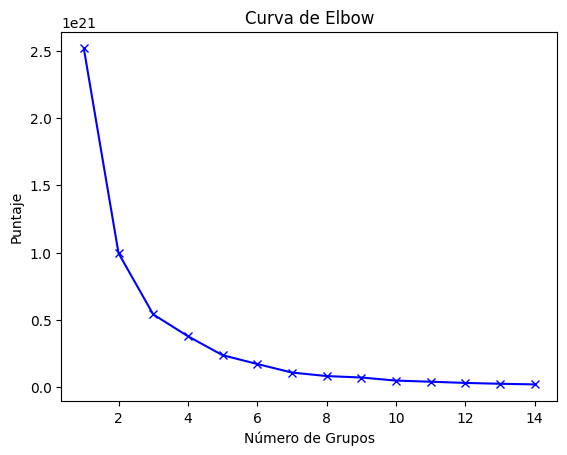

In [28]:
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in Nc]
print(kmeans)
score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]
print(score)
plt.plot(Nc,score, 'bx-')
plt.xlabel('Número de Grupos')
plt.ylabel('Puntaje')
plt.title('Curva de Elbow')
plt.show()

In [29]:
num_clusters = 4

In [30]:
data=df2[['PORCENTAJE_COBERTURA','MONTO_PRESTAMO','INCOME']]

In [31]:
#Segmentación de KMEANS
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
kmeans.fit(data)  #Acá se entrena

KMeans(n_clusters=4, n_init=10)

In [32]:
pd.DataFrame(kmeans.predict(data)).value_counts()

,count
0,
0,67885
3,3110
1,457
2,100


In [33]:
from sklearn.metrics import silhouette_score

In [34]:
def form_cluster(x,k):
    no_clusters = k
    model = KMeans(n_clusters=no_clusters,init='k-means++', n_init=10,random_state = 123 )
    model.fit(x)
    labels = model.labels_
    #print(labels)
    # Cacluate the silhouette score
    sh_score = silhouette_score(x,labels)
    print(sh_score)
    return sh_score

In [35]:
prediction = kmeans.predict(data)

In [36]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [37]:
form_cluster(data,4)

0.8739052086427619


0.8739052086427619

In [38]:
form_cluster(data,5)

0.8336591757427821


0.8336591757427821

In [39]:
model = KMeans(n_clusters=4,init='k-means++', n_init=10,random_state = 123 )
model.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=123)

In [40]:
prediction= model.predict(X)

In [41]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [42]:
pronosseg = pd.DataFrame(prediction) #vuelve el array en un dataframe

In [45]:
pronosseg.columns=['Segmento']  # le pone nombre a la columna

In [46]:
data = data[['MONTO_PRESTAMO','INCOME','PORCENTAJE_COBERTURA']]
data.head()

,MONTO_PRESTAMO,INCOME,PORCENTAJE_COBERTURA
0,10724.0,2059190.0,1.0
1,6843.0,3092362.8,1.0
2,12154.0,3787848.1,1.0
3,5197.0,1619668.1,1.0
4,50000.0,15582722.1,0.9


In [47]:
res1=pd.concat([data,pronosseg],axis=1).groupby(['Segmento']).mean()
#res1.style.applymap(lambda x: 'background-color : yellow' if x>res1.iloc[0,0] else '')
res1

,MONTO_PRESTAMO,INCOME,PORCENTAJE_COBERTURA
Segmento,,,
0,230206.8,23421624.7,1.0
1,5350686.2,1321159188.8,0.9
2,9180699.7,3381509479.2,0.8
3,1850980.3,346892082.4,0.9


In [48]:
pronosseg.head()

,Segmento
0,0
1,0
2,0
3,0
4,0


In [49]:
data_final=pd.concat([df2,pronosseg],axis=1)

In [50]:
data_final.head()

,RUC,NOMBRE_EMPRESA,SECTOR,BANCO,MONTO_PRESTAMO,FLG_1MM,MONTO_COBERTURA,DEPARTAMENTO,INCOME,PORCENTAJE_COBERTURA,Segmento
0,10000006209.0,HERTER REATEGUI MORI,INDUSTRIA MANUFACTURERA,CRÉDITO,10724.0,0,10509.5,UCAYALI,2059190.0,1.0,0
1,10000027443.0,RANDOLFO SANCHEZ SANCHEZ,OTROS SERVICIOS,CRÉDITO,6843.0,0,6706.1,UCAYALI,3092362.8,1.0,0
2,10000046383.0,DAVID RAMON FLORES RAMIREZ,COMERCIO,CRÉDITO,12154.0,0,11910.9,UCAYALI,3787848.1,1.0,0
3,10000051891.0,BETTY RUIZ DELGADO,COMERCIO,CRÉDITO,5197.0,0,5093.1,UCAYALI,1619668.1,1.0,0
4,10000059205.0,NILTON RENGIFO MURRIETA,COMERCIO,BANCO BBVA PERU,50000.0,0,47500.0,LORETO,15582722.1,0.9,0


In [51]:
data_final['Segmento'].value_counts()

,count
Segmento,
0,67885
3,3110
1,457
2,100


In [ ]:
#EXPORTAR BASE

data_final.to_csv("resultados_test.csv",index=False, sep = '|')

In [52]:
data_final.to_excel("resultados_test_1.xlsx",index=False)